# Data Science for Cyber Security -- Final Project

# Malware Detection (Static Analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import tensorflow as tf
from tensorflow import keras
import glob
import os

## Part1. Data Preprocessing

### Read Data

In [3]:
# .text(code) Section Header Data
header_df = pd.read_csv("https://drive.google.com/uc?id=1G69_tLvo9QluAh7LmaOA-KZWbKusXAd4")
header_df.head()

,hash,size_of_data,virtual_address,entropy,virtual_size,malware
0,071e8c3f8922e186e57548cd4c703a5d,443392,4096,6.529624,442984,1
1,33f8e6d08a6aae939f25a8e0d63dd523,331264,4096,6.604314,330784,1
2,b68abd064e975e1c6d5f25e748663076,74240,4096,6.046789,73819,1
3,72049be7bd30ea61297ea624ae198067,219648,4096,6.497018,219524,1
4,c9b3700a77facf29172f32df6bc77f48,262144,4096,6.638142,261943,1


In [4]:
# Import Data
import_df = pd.read_csv("https://drive.google.com/uc?id=1freGdbuJLDGK4JQ5IMLtw6fACo3NG1CK")
import_df.head()

,hash,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,FindClose,LeaveCriticalSection,EnterCriticalSection,VirtualAlloc,DeleteCriticalSection,WideCharToMultiByte,RegCloseKey,ReadFile,SetFilePointer,GetCurrentProcess,GetACP,UnhandledExceptionFilter,RaiseException,RtlUnwind,TlsGetValue,TlsSetValue,GetModuleHandleW,GetCPInfo,GetCurrentProcessId,VirtualFree,GetDC,GetModuleFileNameW,CreateFileW,SetEndOfFile,SetLastError,GetCommandLineW,DestroyWindow,QueryPerformanceCounter,VirtualQuery,...,malloc,_XcptFilter,__vbaFreeVarList,CoInitializeEx,GetTextColor,GetUserNameA,listen,inet_addr,TextOutW,__p__commode,IsValidAcl,gethostname,PostThreadMessageW,ReportEventW,__vbaFreeObj,CreateFileMappingA,DragQueryFileW,_onexit,ImpersonateLoggedOnUser,InitializeAcl,MessageBoxIndirectW,SendDlgItemMessageW,__vbaVarMove,GetDriveTypeA,GetCurrentObject,GetNearestPaletteIndex,DosDateTimeToFileTime,FreeConsole,SetFileSecurityA,DuplicateToken,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,malware
0,071e8c3f8922e186e57548cd4c703a5d,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,33f8e6d08a6aae939f25a8e0d63dd523,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,b68abd064e975e1c6d5f25e748663076,1,1,1,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,72049be7bd30ea61297ea624ae198067,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,c9b3700a77facf29172f32df6bc77f48,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
# Image Data
image_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset/raw_pe_images.csv")
image_df.head()

,hash,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,pix_10,pix_11,pix_12,pix_13,pix_14,pix_15,pix_16,pix_17,pix_18,pix_19,pix_20,pix_21,pix_22,pix_23,pix_24,pix_25,pix_26,pix_27,pix_28,pix_29,pix_30,pix_31,pix_32,pix_33,pix_34,pix_35,pix_36,pix_37,pix_38,...,pix_985,pix_986,pix_987,pix_988,pix_989,pix_990,pix_991,pix_992,pix_993,pix_994,pix_995,pix_996,pix_997,pix_998,pix_999,pix_1000,pix_1001,pix_1002,pix_1003,pix_1004,pix_1005,pix_1006,pix_1007,pix_1008,pix_1009,pix_1010,pix_1011,pix_1012,pix_1013,pix_1014,pix_1015,pix_1016,pix_1017,pix_1018,pix_1019,pix_1020,pix_1021,pix_1022,pix_1023,malware
0,b324140e1fb35dc6b694879ba1f2be45,15,15,239,15,223,36,102,243,102,102,254,36,40,7,102,92,15,15,102,84,239,15,15,239,192,232,64,64,3,0,229,108,0,131,83,136,76,0,255,...,252,35,194,173,219,197,254,46,101,233,209,216,32,161,4,236,39,134,188,162,108,25,189,254,114,4,238,91,66,255,31,242,245,169,212,17,255,160,122,1
1,1d32b1326a524b163eb74af645cd34d5,234,196,8,20,182,56,27,223,144,255,207,0,77,81,112,176,131,222,100,236,83,3,4,136,136,252,235,84,30,235,118,124,224,77,27,112,125,55,0,...,58,44,7,124,67,90,242,212,41,228,172,193,242,131,50,9,88,253,78,207,35,249,162,162,36,220,59,180,74,213,189,228,156,54,189,82,177,125,193,1
2,e44fea4913fc9fd91b8b07c4670aeac4,196,255,5,97,35,112,219,189,217,66,36,90,117,0,69,217,132,221,0,16,65,16,139,139,255,228,203,137,69,250,229,139,0,0,0,0,0,0,0,...,193,230,253,197,234,255,199,196,233,254,203,237,254,205,238,255,208,241,253,211,244,255,216,245,254,219,246,255,222,224,254,189,227,255,192,231,253,196,233,1
3,95badb16d862ba94ae85c44e4b31d749,232,252,183,39,51,1,255,87,94,128,69,252,255,236,0,150,80,116,255,100,141,198,141,43,57,1,195,3,255,235,57,232,168,1,255,137,0,241,95,...,233,226,236,177,216,233,0,92,8,59,49,1,71,57,57,220,51,56,143,90,49,59,1,203,60,48,134,138,62,48,210,52,55,95,230,48,53,103,65,1
4,f30f32a4f42678ef49a543356d580232,81,84,204,228,255,157,76,254,128,39,79,255,0,255,48,0,80,0,198,89,69,141,254,0,141,69,224,83,0,0,186,0,69,4,199,255,79,59,0,...,233,0,233,236,233,60,233,53,0,0,0,50,62,145,230,244,53,55,127,24,0,48,0,230,57,52,0,203,55,50,24,69,64,53,52,216,200,55,58,1


### Merge Dataframes

In [0]:
# Merge those three dataset with key="hash"
train_df = pd.merge(header_df, import_df, on="hash")
train_df = pd.merge(train_df, image_df, on="hash")

In [7]:
# Drop all duplicated observations
train_df = train_df.drop_duplicates(subset=["hash"], keep=False)
train_df.head()

,hash,size_of_data,virtual_address,entropy,virtual_size,malware_x,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,FindClose,LeaveCriticalSection,EnterCriticalSection,VirtualAlloc,DeleteCriticalSection,WideCharToMultiByte,RegCloseKey,ReadFile,SetFilePointer,GetCurrentProcess,GetACP,UnhandledExceptionFilter,RaiseException,RtlUnwind,TlsGetValue,TlsSetValue,GetModuleHandleW,GetCPInfo,GetCurrentProcessId,VirtualFree,GetDC,GetModuleFileNameW,CreateFileW,SetEndOfFile,...,pix_985,pix_986,pix_987,pix_988,pix_989,pix_990,pix_991,pix_992,pix_993,pix_994,pix_995,pix_996,pix_997,pix_998,pix_999,pix_1000,pix_1001,pix_1002,pix_1003,pix_1004,pix_1005,pix_1006,pix_1007,pix_1008,pix_1009,pix_1010,pix_1011,pix_1012,pix_1013,pix_1014,pix_1015,pix_1016,pix_1017,pix_1018,pix_1019,pix_1020,pix_1021,pix_1022,pix_1023,malware
0,071e8c3f8922e186e57548cd4c703a5d,443392,4096,6.529624,442984,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,...,140,61,255,148,239,86,52,123,197,125,179,208,227,98,77,78,198,232,23,213,110,56,107,91,123,145,105,169,70,47,192,190,10,15,81,104,187,121,61,1
1,33f8e6d08a6aae939f25a8e0d63dd523,331264,4096,6.604314,330784,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,162,140,135,62,48,52,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,b68abd064e975e1c6d5f25e748663076,74240,4096,6.046789,73819,1,1,1,1,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,112,108,114,0,114,110,0,25,163,40,5,74,174,170,56,56,57,57,57,58,58,59,62,239,160,81,2,179,124,159,49,50,50,51,52,52,53,54,1
3,72049be7bd30ea61297ea624ae198067,219648,4096,6.497018,219524,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,...,255,255,255,255,255,255,255,194,231,237,204,0,0,194,231,235,202,0,0,196,230,235,201,0,0,0,217,220,199,0,0,0,0,1,0,0,0,0,0,1
4,c9b3700a77facf29172f32df6bc77f48,262144,4096,6.638142,261943,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,236,216,186,236,131,233,0,62,57,63,58,48,55,61,49,51,56,61,15,6,20,0,182,132,57,104,201,85,58,59,49,54,54,55,56,57,61,63,50,1


In [8]:
# Total amount of data
print("There are {} columns in the training data now.".format(len(train_df.columns)))
print("There are {} rows in the training data now.".format(len(train_df)))

There are 2032 columns in the training data now.
There are 42283 rows in the training data now.


In [9]:
# check if observations are mislabeled
check_df = train_df[["malware_x", "malware_y", "malware"]]
check_df.head()

,malware_x,malware_y,malware
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [10]:
s = 0
for i in range(len(check_df)):
    if not (check_df.iloc[i,0] == check_df.iloc[i,1] == check_df.iloc[i,2]):
        print(False)
        s += 1
print("There are {} rows have been error labeled.".format(s)) # correct      

There are 0 rows have been error labeled.


In [11]:
# drop redundant columns
train_df = train_df.drop(["malware_x", "malware_y"], axis=1)
print("There are {} columns in the training data now.".format(len(train_df.columns)))

There are 2030 columns in the training data now.


In [12]:
train_df.head()

,hash,size_of_data,virtual_address,entropy,virtual_size,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,FindClose,LeaveCriticalSection,EnterCriticalSection,VirtualAlloc,DeleteCriticalSection,WideCharToMultiByte,RegCloseKey,ReadFile,SetFilePointer,GetCurrentProcess,GetACP,UnhandledExceptionFilter,RaiseException,RtlUnwind,TlsGetValue,TlsSetValue,GetModuleHandleW,GetCPInfo,GetCurrentProcessId,VirtualFree,GetDC,GetModuleFileNameW,CreateFileW,SetEndOfFile,SetLastError,...,pix_985,pix_986,pix_987,pix_988,pix_989,pix_990,pix_991,pix_992,pix_993,pix_994,pix_995,pix_996,pix_997,pix_998,pix_999,pix_1000,pix_1001,pix_1002,pix_1003,pix_1004,pix_1005,pix_1006,pix_1007,pix_1008,pix_1009,pix_1010,pix_1011,pix_1012,pix_1013,pix_1014,pix_1015,pix_1016,pix_1017,pix_1018,pix_1019,pix_1020,pix_1021,pix_1022,pix_1023,malware
0,071e8c3f8922e186e57548cd4c703a5d,443392,4096,6.529624,442984,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,...,140,61,255,148,239,86,52,123,197,125,179,208,227,98,77,78,198,232,23,213,110,56,107,91,123,145,105,169,70,47,192,190,10,15,81,104,187,121,61,1
1,33f8e6d08a6aae939f25a8e0d63dd523,331264,4096,6.604314,330784,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,162,140,135,62,48,52,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,b68abd064e975e1c6d5f25e748663076,74240,4096,6.046789,73819,1,1,1,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,112,108,114,0,114,110,0,25,163,40,5,74,174,170,56,56,57,57,57,58,58,59,62,239,160,81,2,179,124,159,49,50,50,51,52,52,53,54,1
3,72049be7bd30ea61297ea624ae198067,219648,4096,6.497018,219524,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,1,...,255,255,255,255,255,255,255,194,231,237,204,0,0,194,231,235,202,0,0,196,230,235,201,0,0,0,217,220,199,0,0,0,0,1,0,0,0,0,0,1
4,c9b3700a77facf29172f32df6bc77f48,262144,4096,6.638142,261943,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,236,216,186,236,131,233,0,62,57,63,58,48,55,61,49,51,56,61,15,6,20,0,182,132,57,104,201,85,58,59,49,54,54,55,56,57,61,63,50,1


### Feature Engineering

In [13]:
# Create new feature called "disk_memory_ratio"
disk_memory_ratio = train_df["size_of_data"] / train_df["virtual_size"]
train_df.insert(loc=5, column="disk_memory_ratio", value=disk_memory_ratio)
train_df.head()

,hash,size_of_data,virtual_address,entropy,virtual_size,disk_memory_ratio,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,FindClose,LeaveCriticalSection,EnterCriticalSection,VirtualAlloc,DeleteCriticalSection,WideCharToMultiByte,RegCloseKey,ReadFile,SetFilePointer,GetCurrentProcess,GetACP,UnhandledExceptionFilter,RaiseException,RtlUnwind,TlsGetValue,TlsSetValue,GetModuleHandleW,GetCPInfo,GetCurrentProcessId,VirtualFree,GetDC,GetModuleFileNameW,CreateFileW,SetEndOfFile,...,pix_985,pix_986,pix_987,pix_988,pix_989,pix_990,pix_991,pix_992,pix_993,pix_994,pix_995,pix_996,pix_997,pix_998,pix_999,pix_1000,pix_1001,pix_1002,pix_1003,pix_1004,pix_1005,pix_1006,pix_1007,pix_1008,pix_1009,pix_1010,pix_1011,pix_1012,pix_1013,pix_1014,pix_1015,pix_1016,pix_1017,pix_1018,pix_1019,pix_1020,pix_1021,pix_1022,pix_1023,malware
0,071e8c3f8922e186e57548cd4c703a5d,443392,4096,6.529624,442984,1.000921,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,...,140,61,255,148,239,86,52,123,197,125,179,208,227,98,77,78,198,232,23,213,110,56,107,91,123,145,105,169,70,47,192,190,10,15,81,104,187,121,61,1
1,33f8e6d08a6aae939f25a8e0d63dd523,331264,4096,6.604314,330784,1.001451,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,162,140,135,62,48,52,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,b68abd064e975e1c6d5f25e748663076,74240,4096,6.046789,73819,1.005703,1,1,1,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,112,108,114,0,114,110,0,25,163,40,5,74,174,170,56,56,57,57,57,58,58,59,62,239,160,81,2,179,124,159,49,50,50,51,52,52,53,54,1
3,72049be7bd30ea61297ea624ae198067,219648,4096,6.497018,219524,1.000565,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,...,255,255,255,255,255,255,255,194,231,237,204,0,0,194,231,235,202,0,0,196,230,235,201,0,0,0,217,220,199,0,0,0,0,1,0,0,0,0,0,1
4,c9b3700a77facf29172f32df6bc77f48,262144,4096,6.638142,261943,1.000767,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,236,216,186,236,131,233,0,62,57,63,58,48,55,61,49,51,56,61,15,6,20,0,182,132,57,104,201,85,58,59,49,54,54,55,56,57,61,63,50,1


### EDA

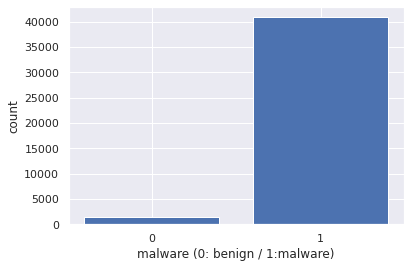

In [14]:
# malware vs. benign distribution
# we need resampling
sns.set()
plt.bar([0,1], [train_df.malware.value_counts()[0], train_df.malware.value_counts()[1]])
plt.xticks([0,1])
plt.xlabel("malware (0: benign / 1:malware)")
plt.ylabel("count")
plt.show()

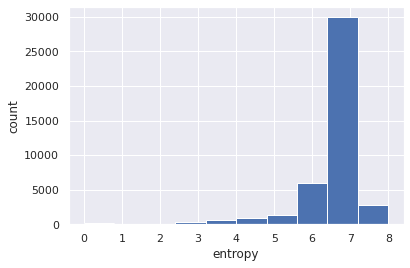

In [15]:
# entropy distribution
plt.hist(train_df.entropy)
plt.xlabel("entropy")
plt.ylabel("count")
plt.show()

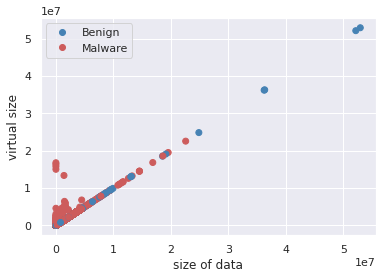

In [16]:
# data size distribution
from matplotlib.colors import ListedColormap
colors = ListedColormap(['steelblue','indianred'])
sc = plt.scatter(train_df["size_of_data"], train_df["virtual_size"], c=train_df["malware"], cmap=colors)
plt.legend(handles=sc.legend_elements()[0], labels=["Benign", 'Malware'])
plt.xlabel("size of data")
plt.ylabel("virtual size")
plt.show()

### ADASYN Resampling

In [0]:
# Drop hash
X = np.array(train_df.iloc[:, 1:-1])
y = np.array(train_df.malware)

In [18]:
# Do ADASYN over sampling
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X, y = ada.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


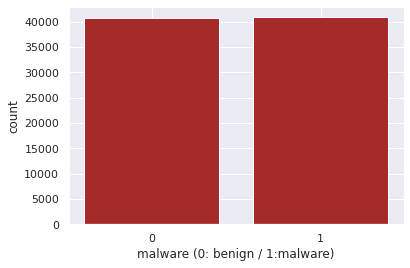

In [19]:
# malware vs. benign distribution after ADASYN resampling
plt.bar([0,1], [len(y[y==0]), len(y[y==1])], color="brown")
plt.xticks([0,1])
plt.xlabel("malware (0: benign / 1:malware)")
plt.ylabel("count")
plt.show()

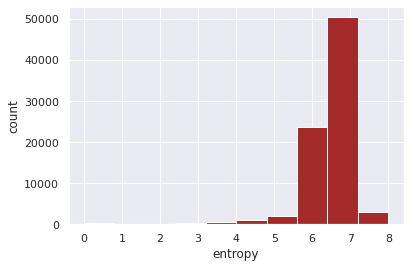

In [20]:
# entropy distribution after ADASYN resampling
plt.hist(X[:, 2], color="brown")
plt.xlabel("entropy")
plt.ylabel("count")
plt.show()

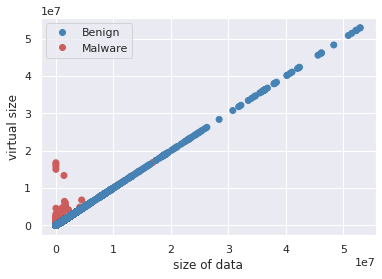

In [21]:
# data size distribution after ADASYN resampling
sc = plt.scatter(X[:, 0], X[:, 3], c=y, cmap=colors)
plt.legend(handles=sc.legend_elements()[0], labels=["Benign", 'Malware'])
plt.xlabel("size of data")
plt.ylabel("virtual size")
plt.show()

## Part2. Header Section Data -- Build DNN Model

In [22]:
# Header Data
header_X = X[:, 0:5]
print(header_X[:5])

[[4.43392000e+05 4.09600000e+03 6.52962359e+00 4.42984000e+05
  1.00092103e+00]
 [3.31264000e+05 4.09600000e+03 6.60431385e+00 3.30784000e+05
  1.00145110e+00]
 [7.42400000e+04 4.09600000e+03 6.04678910e+00 7.38190000e+04
  1.00570314e+00]
 [2.19648000e+05 4.09600000e+03 6.49701757e+00 2.19524000e+05
  1.00056486e+00]
 [2.62144000e+05 4.09600000e+03 6.63814158e+00 2.61943000e+05
  1.00076734e+00]]


In [23]:
# Standardization
from sklearn.preprocessing import StandardScaler
header_X = StandardScaler().fit_transform(header_X)
print(header_X[:5])

[[-0.10569551 -0.03205049  0.23969828 -0.10764297 -0.01898153]
 [-0.17650603 -0.03205049  0.34858063 -0.17824818 -0.01756819]
 [-0.33882056 -0.03205049 -0.46417062 -0.33995112 -0.00623086]
 [-0.24699322 -0.03205049  0.19216571 -0.24826188 -0.01993119]
 [-0.22015635 -0.03205049  0.39789419 -0.22156845 -0.0193913 ]]


In [0]:
def header_model():
    model = keras.models.Sequential(name="header_dnn")
    model.add(keras.layers.Dense(32, input_dim=header_X.shape[1], activation="relu"))
    model.add(keras.layers.Dense(32, activation="relu"))
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    return model

In [25]:
header_dnn = header_model()
header_dnn.summary()

Model: "header_dnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 3,425
Trainable params: 3,425
Non-trainable params: 0
_________________________________________________________________


In [0]:
def compile_and_train(model, X, alpha, patience):
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=alpha), 
              loss=keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy'])
    file_path = model.name + ".hdf5"
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    checkpoint = keras.callbacks.ModelCheckpoint(file_path, monitor='loss', verbose=0, save_weights_only=True, save_best_only=True, mode='auto', period=1)
    history = model.fit(X, y, epochs=300, callbacks=[early_stopping, checkpoint], validation_split=0.4, batch_size=80, shuffle=True)
    model.save(file_path)
    return history

In [27]:
header_history = compile_and_train(header_dnn, header_X, 3e-4, 20)

Epoch 1/300
612/612 [==============================] - 2s 4ms/step - loss: 0.4301 - accuracy: 0.8350 - val_loss: 1.4302 - val_accuracy: 0.0000e+00
Epoch 2/300
612/612 [==============================] - 2s 3ms/step - loss: 0.3577 - accuracy: 0.8413 - val_loss: 1.4033 - val_accuracy: 0.1229
Epoch 3/300
612/612 [==============================] - 2s 3ms/step - loss: 0.3512 - accuracy: 0.8477 - val_loss: 1.3663 - val_accuracy: 0.1471
Epoch 4/300
612/612 [==============================] - 2s 3ms/step - loss: 0.3469 - accuracy: 0.8486 - val_loss: 1.4373 - val_accuracy: 0.1087
Epoch 5/300
612/612 [==============================] - 2s 3ms/step - loss: 0.3433 - accuracy: 0.8492 - val_loss: 1.2795 - val_accuracy: 0.1887
Epoch 6/300
612/612 [==============================] - 2s 3ms/step - loss: 0.3396 - accuracy: 0.8498 - val_loss: 1.2906 - val_accuracy: 0.1665
Epoch 7/300
612/612 [==============================] - 2s 3ms/step - loss: 0.3357 - accuracy: 0.8511 - val_loss: 1.3106 - val_accuracy: 0.

The training accuracy of section header model: 89.71%
The validation accuracy of section header model: 58.46%


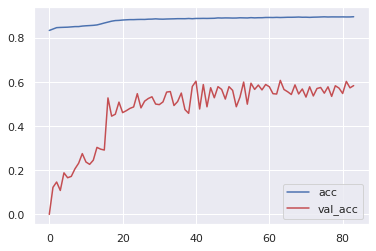

In [28]:
# The change of training accuracy and validation accuracy
print("The training accuracy of section header model: {}%".format(round(header_history.history["accuracy"][-1]*100, 2)))
print("The validation accuracy of section header model: {}%".format(round(header_history.history["val_accuracy"][-1]*100, 2)))


sns.set()

header_acc = header_history.history["accuracy"]
header_val_acc = header_history.history["val_accuracy"]

plt.plot(header_acc, "b-", label="acc")
plt.plot(header_val_acc, "r-", label="val_acc")
plt.legend()
plt.show()

## Part3. Import Data -- Build DNN Model

In [29]:
# Import Data
import_X = X[:, 5:1005]
print(import_X[:5])

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


In [30]:
# Use PCA on import data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()
pca.fit_transform(import_X)
evr = pca.explained_variance_ratio_

print(evr[:50])

[0.30551161 0.14745809 0.12729677 0.07992873 0.03218743 0.03005649
 0.02438346 0.01386609 0.0125088  0.01095256 0.00832843 0.00637474
 0.00576745 0.00516138 0.00491347 0.00453915 0.00431081 0.00413218
 0.0038529  0.00377605 0.0033852  0.00323161 0.00299237 0.00292605
 0.00282783 0.00257709 0.00249517 0.00237953 0.00232765 0.00223498
 0.00213049 0.00207172 0.00201726 0.00189608 0.00182543 0.00169457
 0.00167864 0.00161015 0.00156334 0.00154187 0.00144195 0.00139526
 0.00136178 0.00134466 0.00131855 0.00129518 0.00128262 0.00125361
 0.00120877 0.00117217]


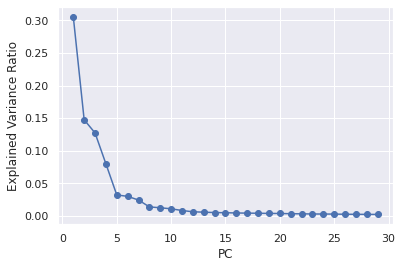

In [31]:
sns.set()
def plotData(data):
  x = [p[0] for p in data]
  y = [p[1] for p in data]
  plt.plot(x, y, '-o')

plotData(list(zip(range(1, 30), evr)))
plt.xlabel("PC")
plt.ylabel("Explained Variance Ratio")
plt.show()

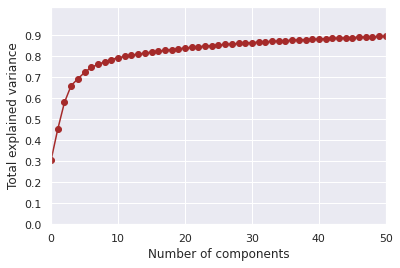

In [32]:
# 主成份的累計貢獻率
tev = [0]*len(evr)
for i in range(len(evr)):
    if i == 0:
        tev[i] = evr[i]
    else:
        tev[i] = tev[i-1] + evr[i]
plt.plot(tev, "-o", c="brown")
plt.xlim(0, 50)
plt.xlabel("Number of components")
plt.ylabel("Total explained variance")
plt.yticks(np.arange(0, 1, .1))
plt.show()

In [33]:
def print_pca_result(n):
    total_percent = sum(evr[:n])*100
    rounded_total_percent = round(total_percent, 2)
    print("選擇 {} 個主成份，可以解釋的總變異為 {} %".format(n, rounded_total_percent))

for i in range(10, 100, 10):
    print_pca_result(i)

選擇 10 個主成份，可以解釋的總變異為 78.42 %
選擇 20 個主成份，可以解釋的總變異為 83.53 %
選擇 30 個主成份，可以解釋的總變異為 86.27 %
選擇 40 個主成份，可以解釋的總變異為 88.07 %
選擇 50 個主成份，可以解釋的總變異為 89.38 %
選擇 60 個主成份，可以解釋的總變異為 90.4 %
選擇 70 個主成份，可以解釋的總變異為 91.24 %
選擇 80 個主成份，可以解釋的總變異為 91.95 %
選擇 90 個主成份，可以解釋的總變異為 92.56 %


In [34]:
# 決定選擇 60 個主成份 (PC)
import_X = PCA(n_components=60).fit_transform(import_X)
print(import_X[0])

[ 1.03022858e+01 -7.71122709e+00 -4.13981043e+00 -8.28920478e+00
 -3.62172906e-01 -2.03734534e-01 -2.63738672e+00 -6.76248040e-01
 -1.60456662e-01 -1.74180702e-01 -2.70219828e-01  4.54082300e-02
  5.63604032e-01  2.41026210e-01  4.13052781e-01 -9.32879294e-02
 -1.18722097e+00 -5.13321025e-04 -6.83138898e-01 -7.43635879e-02
 -2.07433925e-02 -1.65012814e-01 -2.90700501e-01 -1.00147704e-01
 -5.53896516e-02  3.64944597e-02 -2.55438845e-01  3.76758718e-02
 -1.72534462e-03 -1.10433167e-01  1.59273107e-02  9.18042279e-02
 -1.44042419e-01  4.55634905e-03  6.93545779e-02 -4.48819248e-02
  1.38141855e-02  1.80835089e-03 -7.51645288e-02  1.00270117e-01
 -7.80239624e-03  5.88967310e-02  4.51466729e-03 -4.26066774e-02
  4.39664258e-03  5.92215105e-02  5.32550158e-03  6.83846197e-02
 -1.63216946e-02 -1.47366919e-02 -4.72642497e-02  2.03074975e-02
  4.68027190e-02  1.97316503e-02 -2.40711017e-02  1.78861860e-02
 -2.81400359e-03 -2.66538053e-02  4.87029034e-02 -1.39985419e-02]


In [0]:
def import_model():
    model = keras.models.Sequential(name="import_dnn")
    model.add(keras.layers.Dense(64, input_dim=import_X.shape[1], activation="relu"))
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(32, activation="relu"))
    model.add(keras.layers.Dense(32, activation="relu"))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    return model

In [36]:
import_dnn = import_model()
import_dnn.summary()

Model: "import_dnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                3904      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3

In [37]:
import_history = compile_and_train(import_dnn, import_X, 1e-4, 12)

Epoch 1/300
612/612 [==============================] - 2s 4ms/step - loss: 0.3652 - accuracy: 0.8259 - val_loss: 0.7878 - val_accuracy: 0.6656
Epoch 2/300
612/612 [==============================] - 2s 4ms/step - loss: 0.1915 - accuracy: 0.9257 - val_loss: 0.5476 - val_accuracy: 0.7829
Epoch 3/300
612/612 [==============================] - 2s 3ms/step - loss: 0.1507 - accuracy: 0.9444 - val_loss: 0.4571 - val_accuracy: 0.8542
Epoch 4/300
612/612 [==============================] - 2s 4ms/step - loss: 0.1323 - accuracy: 0.9524 - val_loss: 0.4065 - val_accuracy: 0.8757
Epoch 5/300
612/612 [==============================] - 2s 3ms/step - loss: 0.1219 - accuracy: 0.9578 - val_loss: 0.3959 - val_accuracy: 0.8841
Epoch 6/300
612/612 [==============================] - 2s 3ms/step - loss: 0.1139 - accuracy: 0.9604 - val_loss: 0.3640 - val_accuracy: 0.8945
Epoch 7/300
612/612 [==============================] - 2s 4ms/step - loss: 0.1083 - accuracy: 0.9625 - val_loss: 0.3461 - val_accuracy: 0.9012

The training accuracy of section header model: 97.97%
The validation accuracy of section header model: 94.26%


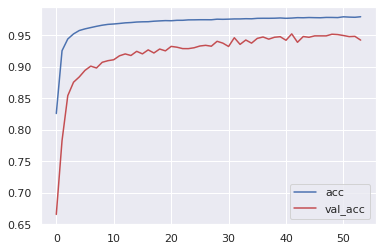

In [38]:
# The change of training accuracy and validation accuracy
print("The training accuracy of section header model: {}%".format(round(import_history.history["accuracy"][-1]*100, 2)))
print("The validation accuracy of section header model: {}%".format(round(import_history.history["val_accuracy"][-1]*100, 2)))

sns.set()

import_acc = import_history.history["accuracy"]
import_val_acc = import_history.history["val_accuracy"]

plt.plot(import_acc, "b-", label="acc")
plt.plot(import_val_acc, "r-", label="val_acc")
plt.legend()
plt.show()

## Part4. Image Data -- Build CNN Model

In [39]:
# Image Data
image_X = X[:, 1005:]
print(image_X[:5])

[[137. 137.  16. ... 187. 121.  61.]
 [  0.  36.   0. ...   0.   0.   0.]
 [192.  69.  12. ...  52.  53.  54.]
 [ 35. 141. 232. ...   0.   0.   0.]
 [199. 254. 198. ...  61.  63.  50.]]


In [40]:
# Normalization (Min-Max) (From [0,255] to [0, 1])
image_X = image_X.astype("float32") / 255.0
# Reshape
image_X = image_X.reshape(image_X.shape[0], 32, 32, 1)
print(image_X[0])

[[[0.5372549 ]
  [0.5372549 ]
  [0.0627451 ]
  ...
  [1.        ]
  [0.05882353]
  [1.        ]]

 [[0.9882353 ]
  [0.95686275]
  [0.27058825]
  ...
  [0.8901961 ]
  [0.9137255 ]
  [0.16862746]]

 [[0.        ]
  [0.        ]
  [0.39607844]
  ...
  [0.        ]
  [0.3137255 ]
  [0.        ]]

 ...

 [[0.22352941]
  [0.80784315]
  [0.31764707]
  ...
  [0.8156863 ]
  [0.04313726]
  [0.84705883]]

 [[0.8901961 ]
  [0.02745098]
  [0.3019608 ]
  ...
  [0.9372549 ]
  [0.3372549 ]
  [0.20392157]]

 [[0.48235294]
  [0.77254903]
  [0.49019608]
  ...
  [0.73333335]
  [0.4745098 ]
  [0.23921569]]]


In [0]:
def image_model():
    model = keras.models.Sequential(name="image_cnn")
    model.add(keras.layers.Input(shape=(32, 32, 1)))
    model.add(keras.layers.Conv2D(32, (4,4), activation="relu", padding="same"))
    model.add(keras.layers.Conv2D(64, (4,4), activation="relu", padding="same"))
    model.add(keras.layers.MaxPooling2D(2,2))
    model.add(keras.layers.Conv2D(128, (4,4), activation="relu", padding="same"))
    model.add(keras.layers.Conv2D(128, (4,4), activation="relu", padding="same"))
    model.add(keras.layers.MaxPooling2D(2,2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation="relu"))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    return model

In [0]:
image_cnn = image_model()

In [43]:
image_cnn.summary()

Model: "image_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        544       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        32832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       131200    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       262272    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0 

In [44]:
image_history = compile_and_train(image_cnn, image_X, 3e-6, 25)

Epoch 1/300
612/612 [==============================] - 12s 19ms/step - loss: 0.4552 - accuracy: 0.8355 - val_loss: 1.6410 - val_accuracy: 0.0000e+00
Epoch 2/300
612/612 [==============================] - 11s 19ms/step - loss: 0.4008 - accuracy: 0.8357 - val_loss: 1.4966 - val_accuracy: 0.0000e+00
Epoch 3/300
612/612 [==============================] - 12s 19ms/step - loss: 0.3721 - accuracy: 0.8365 - val_loss: 1.4220 - val_accuracy: 0.0098
Epoch 4/300
612/612 [==============================] - 12s 19ms/step - loss: 0.3568 - accuracy: 0.8419 - val_loss: 1.3974 - val_accuracy: 0.0500
Epoch 5/300
612/612 [==============================] - 11s 19ms/step - loss: 0.3453 - accuracy: 0.8484 - val_loss: 1.3334 - val_accuracy: 0.0946
Epoch 6/300
612/612 [==============================] - 11s 19ms/step - loss: 0.3338 - accuracy: 0.8540 - val_loss: 1.2398 - val_accuracy: 0.1659
Epoch 7/300
612/612 [==============================] - 11s 19ms/step - loss: 0.3241 - accuracy: 0.8590 - val_loss: 1.2348 

The training accuracy of section header model: 95.11%
The validation accuracy of section header model: 85.1%


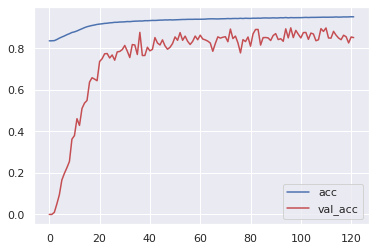

In [45]:
# The change of training accuracy and validation accuracy
print("The training accuracy of section header model: {}%".format(round(image_history.history["accuracy"][-1]*100, 2)))
print("The validation accuracy of section header model: {}%".format(round(image_history.history["val_accuracy"][-1]*100, 2)))

sns.set()

image_acc = image_history.history["accuracy"]
image_val_acc = image_history.history["val_accuracy"]

plt.plot(image_acc, "b-", label="acc")
plt.plot(image_val_acc, "r-", label="val_acc")
plt.legend()
plt.show()

## Part5. Model Ensemble

In [0]:
def model_ensemble(models, model_input):
    outputs = [model.outputs[0] for model in models]
    y = keras.layers.Dense(8, activation="relu")(outputs)
    y = keras.layers.Dense(1, activation="sigmoid")(y)
    model = Model(model_input, y, name="model_ensemble")
    return model

In [0]:
# Load models
header_dnn = header_model()
import_dnn = import_model()
image_cnn = image_model()

In [0]:
# combine the outputs of these three models
combinedInput = keras.layers.concatenate([header_dnn.output, import_dnn.output, image_cnn.output])
# Then add a Dense Layer in the end
x = keras.layers.Dense(16, activation="relu")(combinedInput)
x = keras.layers.Dense(1, activation="sigmoid")(x)
# The final ensemble model
model = keras.models.Model(inputs=[header_dnn.input, import_dnn.input, image_cnn.input], outputs=x)

In [49]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=3e-4), 
              loss=keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy'])
file_path = "model_ensemble.hdf5"
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=12)
checkpoint = keras.callbacks.ModelCheckpoint(file_path, monitor='loss', verbose=0, save_weights_only=True, save_best_only=True, mode='auto', period=1)
history = model.fit([header_X, import_X, image_X], y, epochs=300, callbacks=[early_stopping, checkpoint], validation_split=0.4, batch_size=80, shuffle=True)
model.save(file_path)

Epoch 1/300
612/612 [==============================] - 13s 21ms/step - loss: 0.4307 - accuracy: 0.8357 - val_loss: 1.3783 - val_accuracy: 0.0000e+00
Epoch 2/300
612/612 [==============================] - 12s 20ms/step - loss: 0.2734 - accuracy: 0.8409 - val_loss: 0.8648 - val_accuracy: 0.7275
Epoch 3/300
612/612 [==============================] - 12s 20ms/step - loss: 0.1800 - accuracy: 0.9378 - val_loss: 0.5304 - val_accuracy: 0.8548
Epoch 4/300
612/612 [==============================] - 12s 20ms/step - loss: 0.1425 - accuracy: 0.9470 - val_loss: 0.4469 - val_accuracy: 0.8908
Epoch 5/300
612/612 [==============================] - 12s 20ms/step - loss: 0.1257 - accuracy: 0.9593 - val_loss: 0.4038 - val_accuracy: 0.9402
Epoch 6/300
612/612 [==============================] - 12s 20ms/step - loss: 0.1186 - accuracy: 0.9611 - val_loss: 0.4403 - val_accuracy: 0.9181
Epoch 7/300
612/612 [==============================] - 12s 20ms/step - loss: 0.1126 - accuracy: 0.9632 - val_loss: 0.3807 - va

The training accuracy of section header model: 98.58%
The validation accuracy of section header model: 95.99%


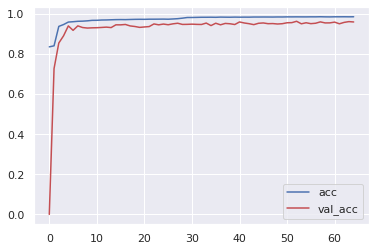

In [50]:
# The change of training accuracy and validation accuracy
print("The training accuracy of section header model: {}%".format(round(history.history["accuracy"][-1]*100, 2)))
print("The validation accuracy of section header model: {}%".format(round(history.history["val_accuracy"][-1]*100, 2)))

sns.set()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(acc, "b-", label="acc")
plt.plot(val_acc, "r-", label="val_acc")
plt.legend()
plt.show()